# Theme of this notebook - sample portfolio consisting of S&P 500 and VIX

* Tried to create a simple portforio with S&P 500 and VIX
* Tried to check the cummulative returns by visualizing them

In [25]:
# First, install pandas-datareader to retrieve financial data from Yahoo Finance
! pip install pandas-datareader

In [26]:
# Import libraries
import pandas_datareader as pdr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf

In [27]:
# Download daily prices for the VIX index as well as the S&P 500 ETF (SPY)
spy = yf.download('SPY', start='1980-09-10', end=datetime.date.today())
vix = yf.download('^VIX', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

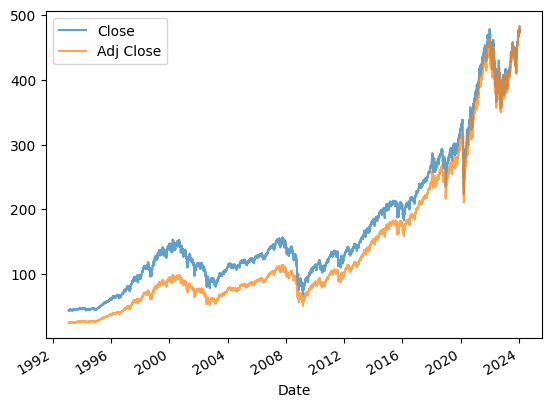

In [28]:
# Plot the difference between SPY's close and adjusted closing prices
spy[['Close', 'Adj Close']].plot(alpha=0.7)

<Axes: xlabel='Date'>

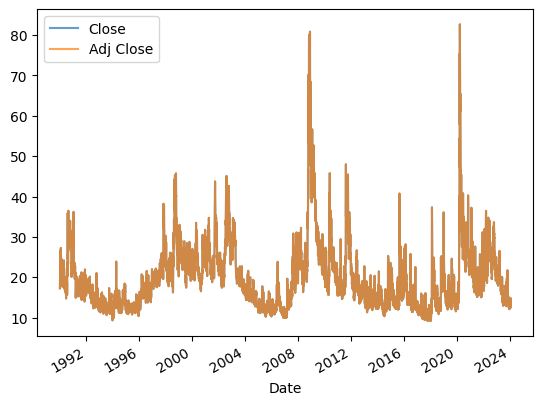

In [29]:
# Plot the difference between VIX's close and adjusted closing prices
vix[['Close', 'Adj Close']].plot(alpha=0.7)

# Note 1: Difference between the closing price and the adjusted closing price
* The closing price is simply the cash value of that specific piece of stock at day's end
* The adjusted closing price reflects the closing price of the stock in relation to other stock attributes.
* In general, <b>the adjusted closing price is considered to be a more technically accurate reflection</b> of the true value of the stock.
* The closing price of a stock is only its cash value at day's end, whereas <b>the adjusted closing price factors in things like dividends, stock splits and new stock offerings<b/>.

# Note 2: Return calculation
  <li>Note, the <b>return</b> of a security can be defined as the percentage change of the security's price $$r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}},$$ where $P_{i,t}$ is the price of security $i$ at time $t$.
  </li>
  <br>
  <li>Additionally, we can make a very crude estimate of the expected return of a security by taking the sample average of a time series of returns $$\mathbb{E}[r_{i,t}] \approx \frac{1}{T}\sum_{j=0}^{T-1} r_{i, t-j} \ .
  $$</li>

In [30]:
# Return Calculation
# First, create a blank DataFrame
spy_vix_returns = pd.DataFrame()

# Second, calculate daily returns by applying the return calculation formula
spy_vix_returns['SPY_ret'] = (spy.loc[:, 'Adj Close'] / spy.loc[:, 'Adj Close'].shift()) - 1
spy_vix_returns['VIX_ret'] = (vix.loc[:, 'Adj Close'] / vix.loc[:, 'Adj Close'].shift()) - 1

In [31]:
# Create a portfolio that does a daily rebalancing to ensure there is 90% SPY and 10% VIX portfolio weights
spy_vix_returns['(0.9SPY+0.1VIX)_ret'] = 0.9*spy_vix_returns['SPY_ret'] + 0.1*spy_vix_returns['VIX_ret']

In [32]:
# Average of returns of the two portfolios
portfolio_mean = spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].mean()
# Standard deviation of daily returns of the two portfolios
portfolio_vola = spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].std()
# Sharpe ratio of the daily returns of the two portfolios
portfolio_sharpe = spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].mean() / spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].std()

print(portfolio_mean)
print(portfolio_vola)
print(portfolio_sharpe)

SPY_ret                0.000450
(0.9SPY+0.1VIX)_ret    0.000639
dtype: float64
SPY_ret                0.011817
(0.9SPY+0.1VIX)_ret    0.007535
dtype: float64
SPY_ret                0.038109
(0.9SPY+0.1VIX)_ret    0.084855
dtype: float64


* ↑ According to each criteria, a simple portforio is better than S&P 500 only.

<Axes: xlabel='Date'>

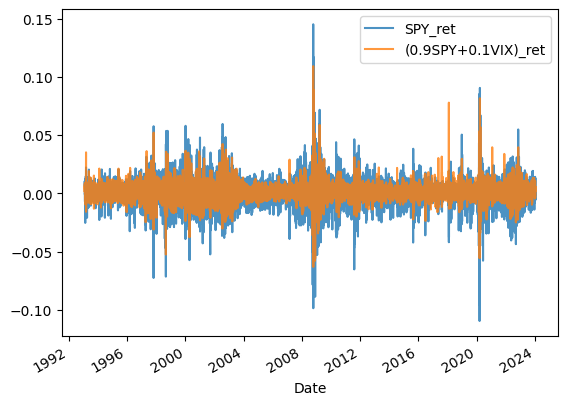

In [33]:
# Plot a time series of the daily returns
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].plot(alpha=0.8)

<Axes: ylabel='Frequency'>

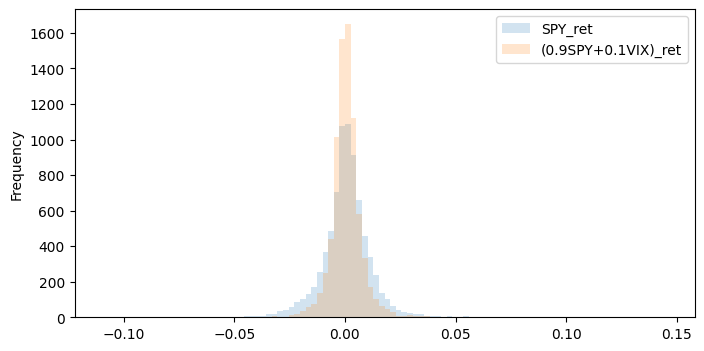

In [34]:
# Plot a histogram of the daily returns
spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].plot(kind='hist', bins=100, figsize=(8,4), alpha=0.2)

In [35]:
portfolio = spy_vix_returns[['SPY_ret', '(0.9SPY+0.1VIX)_ret']].copy()
portfolio.dropna(inplace=True)

<Axes: xlabel='Date'>

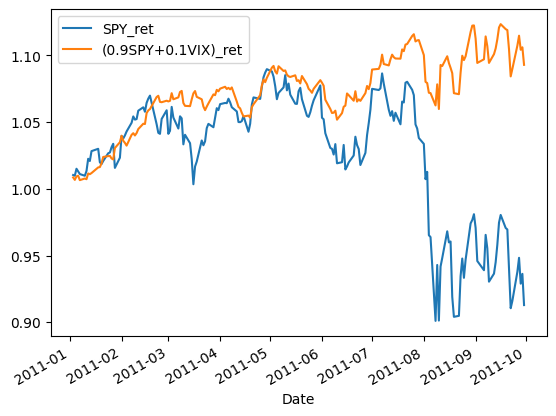

In [36]:
# Let's compare the portforio's cumulative product　return with S&P 500's return in various periods
(portfolio+1).loc['2011-01':'2011-09'].cumprod().plot()

<Axes: xlabel='Date'>

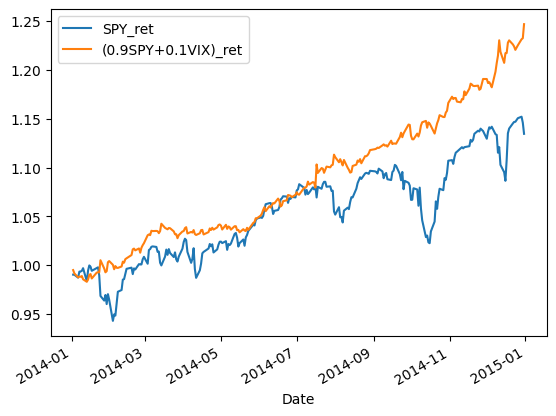

In [37]:
(portfolio+1).loc['2014-01':'2014-12'].cumprod().plot()

<Axes: xlabel='Date'>

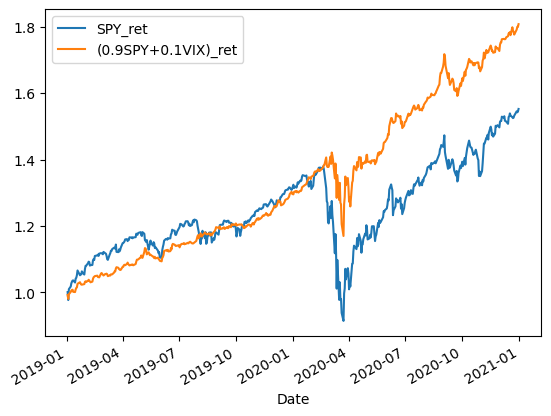

In [38]:
(portfolio+1).loc['2019-01':'2020-12'].cumprod().plot()

<Axes: xlabel='Date'>

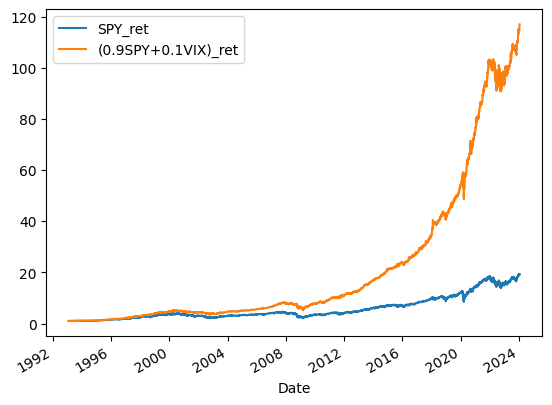

In [39]:
# Plot the Gross Return of SPY and the SPY-VIX daily rebalanced portfolio for the full sample
(portfolio+1).cumprod().plot()

# Conclusion
* It is clear that mixing some ratio of  VIX with S&P 500 has better returns than holding S&P 500 only.
* Allocation ratio should be determined based on each investor's objective and risk tolerance.